# Transformation of phase space data

For some research purposes you may wish to manipulate the data in the phase space - for instance, rotate the data around an axis because different simulation codes are using different coordinate systems. This example shows how you can use this code to translate, rotate, and re-grid the phase space data. All these operations occur using the `transform` module.

First, we will start by reading in our example data:

In [1]:
from pathlib import Path
import sys
sys.path.append('../')  # not necessary when the library is installed
from ParticlePhaseSpace import DataLoaders
from ParticlePhaseSpace import PhaseSpace

test_data_loc = Path(r'../tests/test_data/coll_PhaseSpace_xAng_0.00_yAng_0.00_angular_error_0.0.phsp').absolute()
ps_data = DataLoaders.Load_TopasData(test_data_loc)
PS = PhaseSpace(ps_data)

let's get a list of the available transform methods:

In [2]:
PS.transform.get_methods()

project
regrid
rotate
translate


## Translations

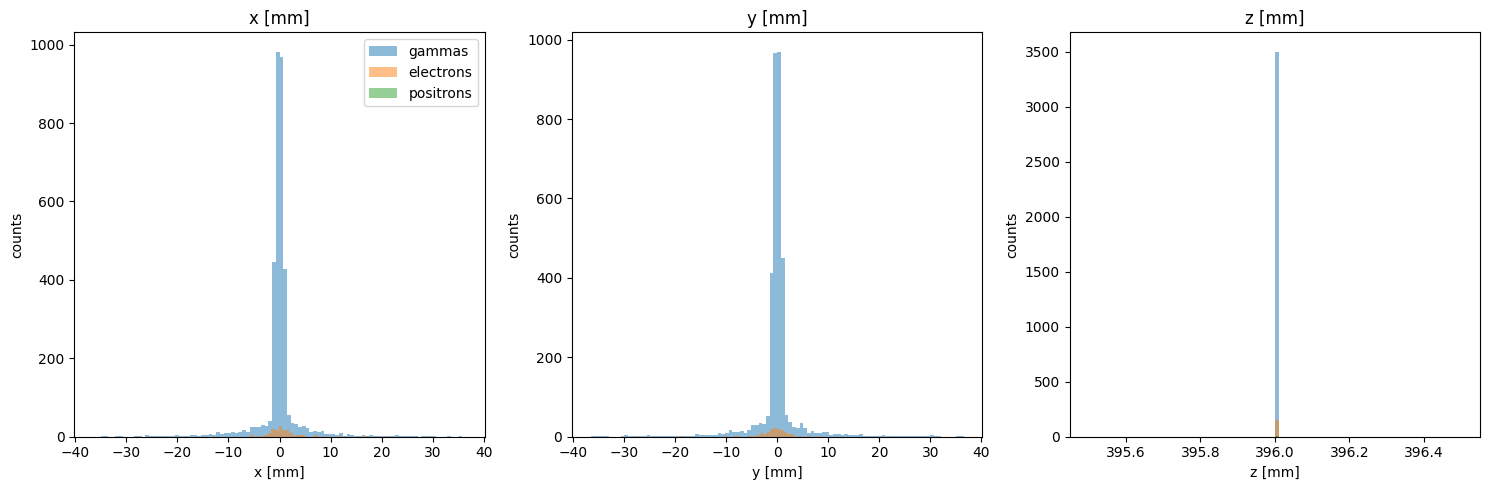

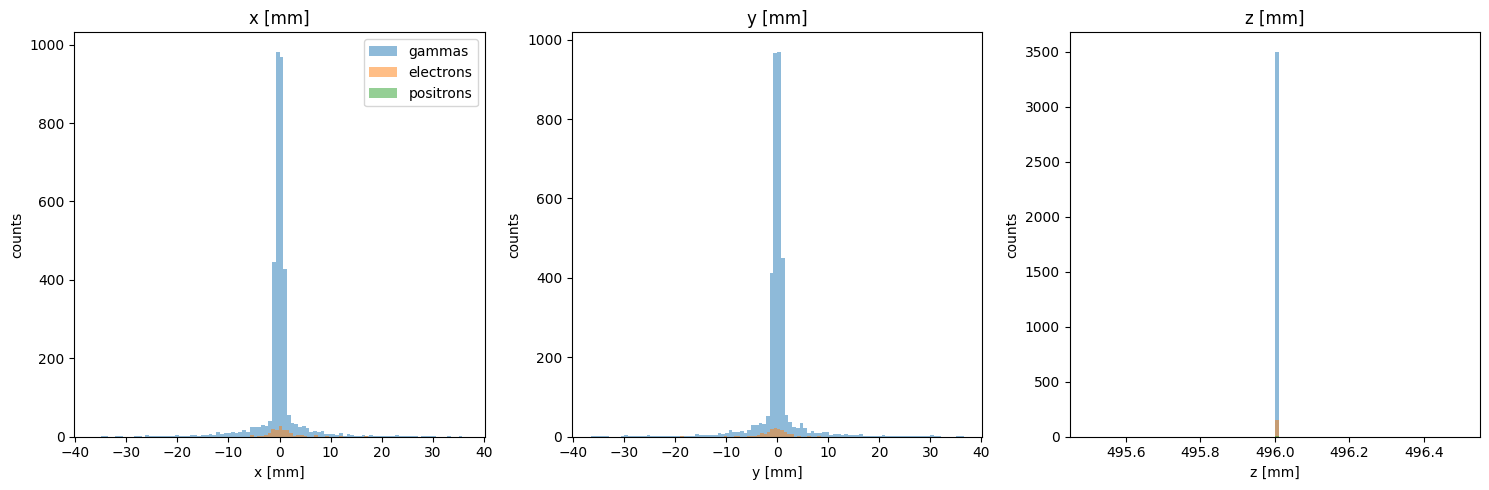

In [3]:
PS_translated = PS.transform.translate(direction='z', distance=100.0, in_place=False)
PS.plot.position_hist_1D()
PS_translated.plot.position_hist_1D()

you can see that the data has been translated 100 mm forward in the z direction; you can also translate in x or y.

## Rotations

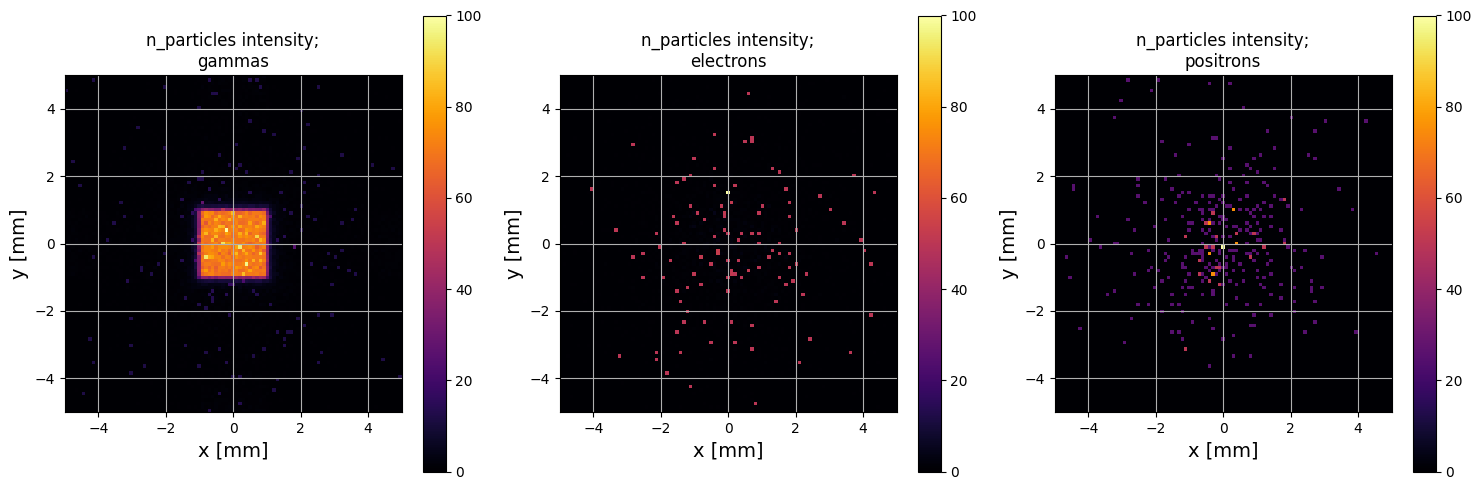

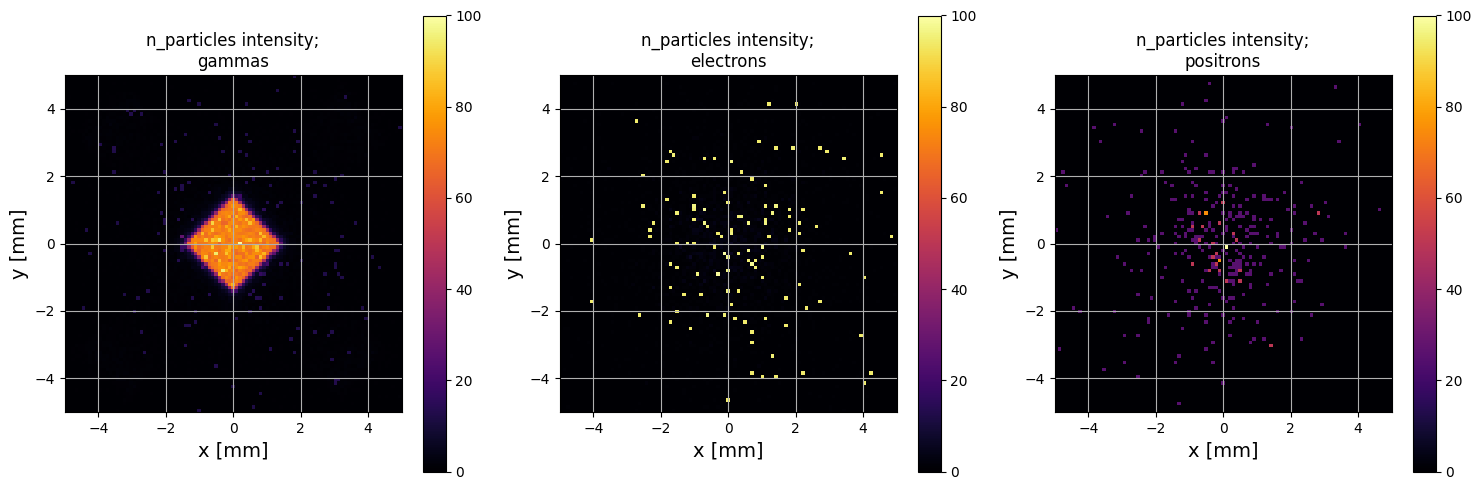

In [4]:
PS_rotated = PS.transform.rotate(rotation_axis='z', angle=45, in_place=False)
PS.plot.particle_positions_hist_2D(xlim=[-5,5], ylim=[-5,5])
PS_rotated.plot.particle_positions_hist_2D(xlim=[-5,5], ylim=[-5,5])

Looking at the gamma plot in particular, it is clear that the requested transformation was succesful; the particle positions are rotated around the z-axis by 45 degrees.

## Rotation of momentum

When rotating the data, you may also wish to rotate the momentum vector as well. In this case, you only have to pass an additional keyword:

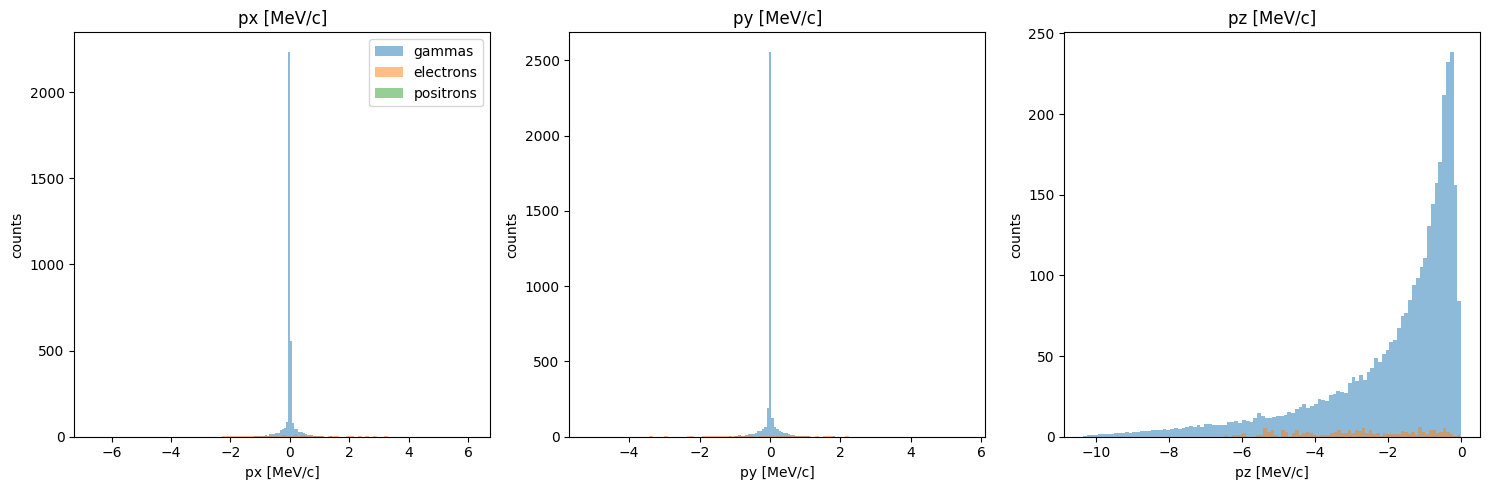

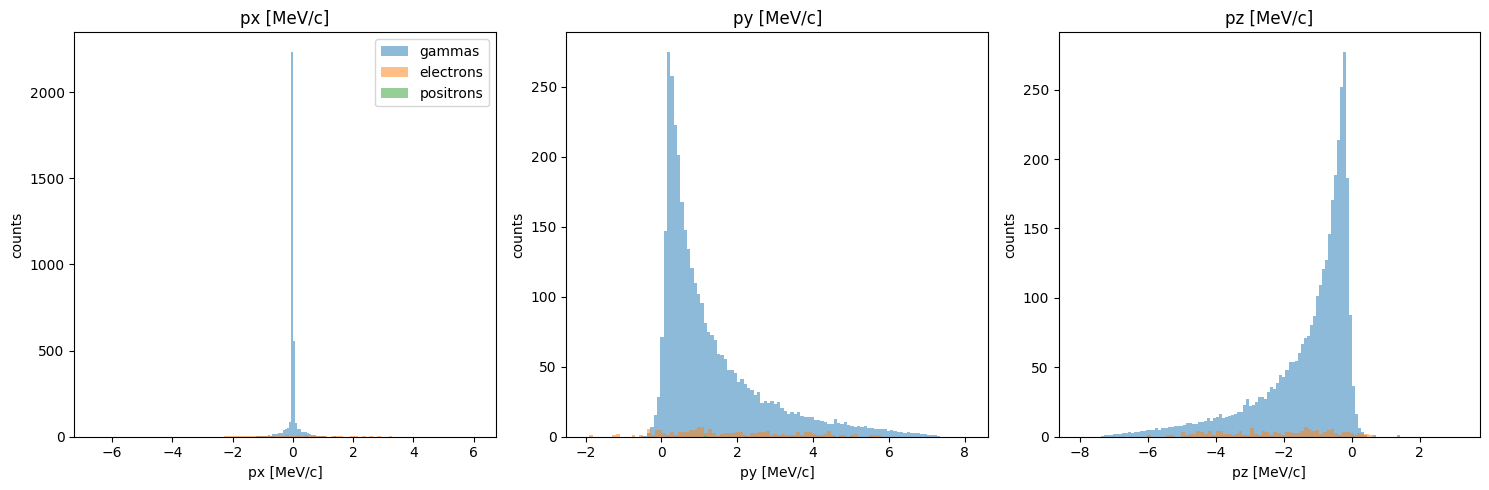

In [5]:
PS_rotated = PS.transform.rotate(rotation_axis='x', angle=45, in_place=False, rotate_momentum_vector=True)
PS.plot.momentum_hist_1D()
PS_rotated.plot.momentum_hist_1D()

note in this case, the momentum which was nearly entirely z directed is now split evenly into y and z, as you would expect after a rotation around the x axis!

## Projection

Another transformation one can carry out it to project the particles in some direction. This operation will update all particle positions accordingly. This is a valid approach under the assumption that the particles do not experience any forces.

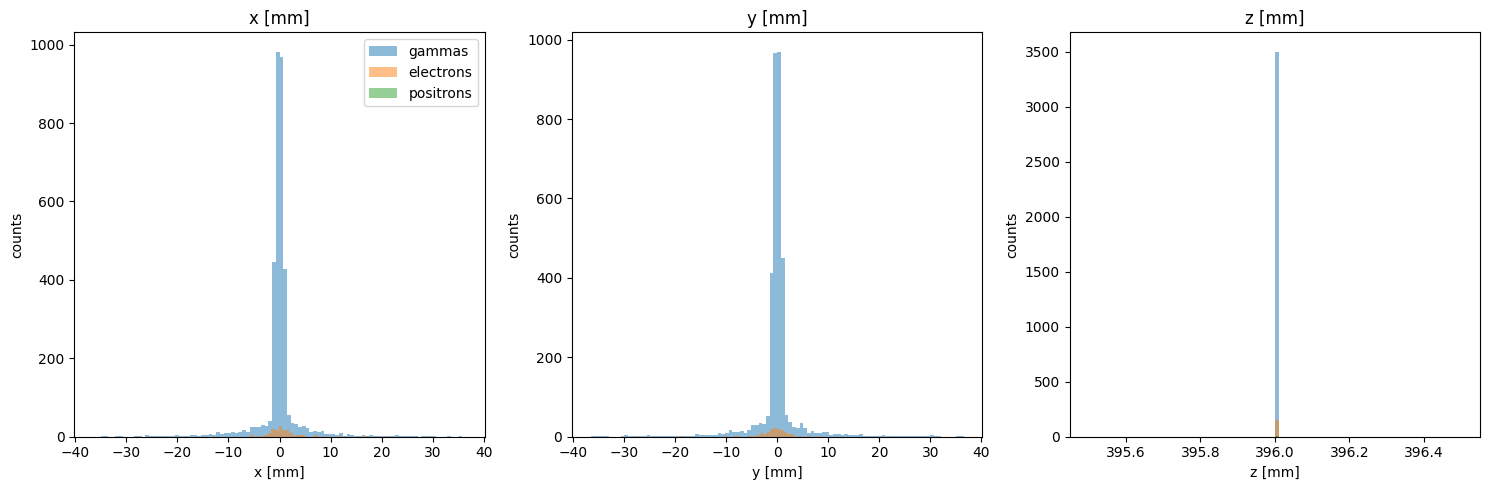

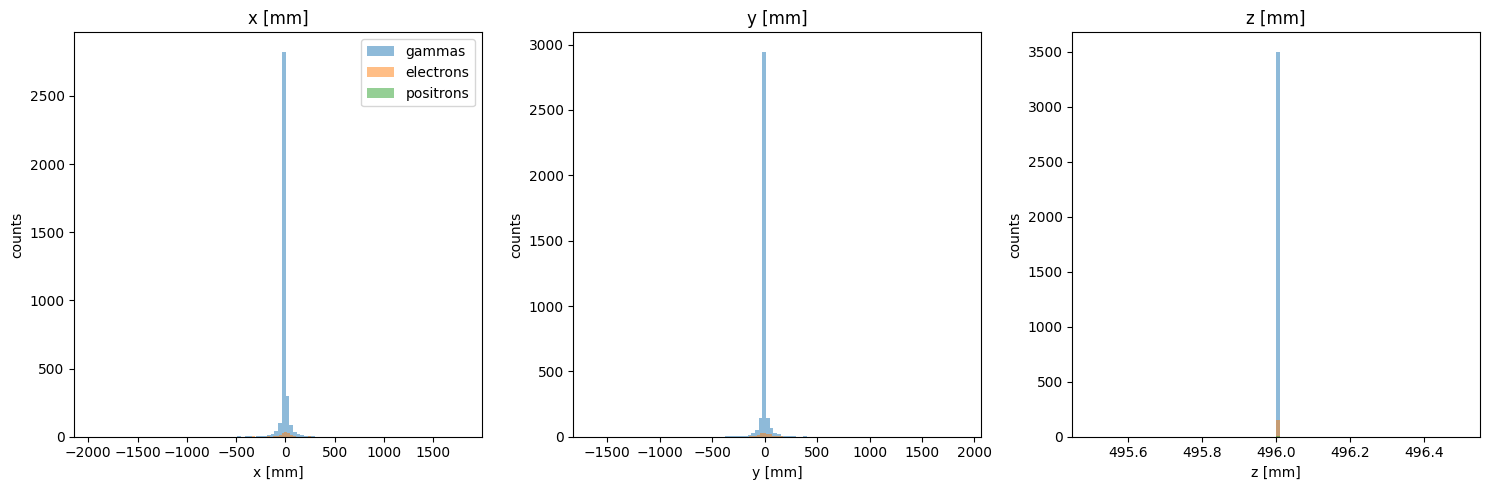

In [6]:
PS_project = PS.transform.project(direction='z', distance=100, in_place=False)
PS.plot.position_hist_1D()
PS_project.plot.position_hist_1D()

Note that the z coordinate has been updated exactly the same way as in the translate case. However, the x and y values are significantly different; whereas they aren't changed by a translation operation, for the projection operation they exhibit substantial broadening as the beam diverges travelling forward (note the x and y limits on the axes!). 

## Regridding

It is also possible to transform the phase space data by regridding it; however, this is somewhat complex and is therefore covered in a [dedicated tutorial](https://bwheelz36.github.io/ParticlePhaseSpace/grid_merge.html).

## Other (less supported!) transformations

Finally, it may be the case that you wish to transform your data in some way we have not listed here. This is very possible with this code; you can directly change all data fields by directly interacting with the pandas data stored at `PhaseSpace.ps_data`. 

**HOWEVER!**
- you do this at your own risk, since there is no way for us to check the validity of any operations you make
- following any edits to the underling data, you should manually `reset_phase_space`, because you have quite likely invalidated any previously calculated quantities. [reset_phase_space](https://bwheelz36.github.io/ParticlePhaseSpace/code_docs.html#ParticlePhaseSpace._ParticlePhaseSpace.PhaseSpace.reset_phase_space) removes any calculated data from the phase space, reducing it to just the [required columns](https://bwheelz36.github.io/ParticlePhaseSpace/phase_space_format.html)